# Péndulo simple. Caso general no lineal

## Mecánica para Ingenieros. Grado en Ingeniería Civil. 

+ Alejandro E. Martínez Castro (email:amcastro@ugr.es).

_Departamento de Mecánica de Estructuras e Ingeniería Hidráulica_

_Universidad de Granada_


<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">licencia de Creative Commons Reconocimiento-NoComercial 4.0 Internacional</a>.

# Objetivos de este cuaderno

En este cuaderno se analiza el movimiento del péndulo simple (también llamado péndulo matemático o péndulo ideal). Para resolver el problema es necesario integrar numéricamente una ecuación diferencial ordinaria de segundo orden, no lineal. 

En este cuaderno se muestran las herramientas de Python para resolver numéricamente una EDO no lineal, con condiciones iniciales conocidas

# Estudio general del péndulo simple

Consideremos un hilo inextensible, de masa despreciable, y de longitud $l$. Consideremos además una masa $m$. La masa se suspende del hilo, y se separa un ángulo $\varphi_0$ de la vertical. Bajo la acción del campo gravitatorio, y de la tensión del hilo, la masa describe un movimiento periódico oscilatorio en torno a la posición de equilibrio. 

Consideremos la siguiente figura, en la cual se ha planteado un ángulo intermedio $\varphi > 0$. En esta posición, se representan las fuerzas que actúan sobre la masa $m$. Estas fuerzas son el peso $\vec{P}$, y la tensión del hilo $\vec{T}$. En la figura se representan con las letras $P$ y $T$ los módulos de estas fuerzas, respectivamente.


<img src="cuaderno7_pendulo_figura1.png" width="250" border="0" hspace="12" vspace="0" alt="Pendulo_inicial">

## Primer paso: cinemática del movimiento

En primer lugar vamos a definir las ligaduras cinemáticas del movimiento. Para eso, se introduce un sistema de referencia fijo, $\mathcal{R}=\lbrace O; x, y \rbrace$ como el que se muestra en la siguiente figura:

<img src="cuaderno7_pendulo_figura2.png" width="250" border="0" hspace="12" vspace="0" alt="Pendulo_inicial">


La posición de la masa $m$ puede describirse mediante el vector $\vec{X}(\varphi)$, 

$$\vec{X}(\varphi) = (l\,\cos(\varphi), l\,\mathrm{sen}(\varphi))$$

A partir de esta relación, y teniendo en cuenta que $\varphi$ es función del tiempo, podemos obtener la velocidad y la aceleración de la partícula. 

$$\vec{\dot{X}}(\varphi) = (-\dot{\varphi}\,l\,\mathrm{sen}(\varphi), \dot{\varphi}\,l\,\cos(\varphi))$$

$$\vec{\ddot{X}}(\varphi) = (-\ddot{\varphi}\,l\,\mathrm{sen}(\varphi)-(\dot{\varphi})^2\,l\,\cos(\varphi),\ddot{\varphi}\,l\,\cos(\varphi)-(\dot{\varphi})^2\,l\,\mathrm{sen}(\varphi))$$

Nótese que en la anterior expresión, el término que lleva $\ddot{\varphi}\,l$ representa la aceleración tangencial, y el término que lleva $(\dot{\varphi})^2\,l$ representa la aceleración normal. 

## Segundo paso: Identificación de las fuerzas

A continuación se identifican las dos fuerzas que intervienen sobre la partícula.

- La fuerza del peso lleva la dirección del eje $x$ y puede representarse como $$\vec{P} = (mg, 0)$$

- El vector tensión puede descomponerse en sus dos componentes en la referencia $\mathcal{R}$. Para eso, observaremos el ángulo $\varphi$ en la siguiente figura: 

<img src="cuaderno7_pendulo_figura3.png" width="150" border="0" hspace="12" vspace="0" alt="Pendulo_inicial">

Y por tanto, $$\vec{T} = (-T\,\cos(\varphi), -T\,\mathrm{sen}(\varphi))$$


La suma de ambas fuerzas será la fuerza total que actúa sobre la partícula: 

$$\sum \vec{F} = (mg - T\,\cos(\varphi), -T\,\mathrm{sen}(\varphi))$$

## Tercer paso: Aplicación de la segunda ley de Newton

La segunda ley de Newton establece que $$\sum \vec{F} = m\,\vec{a}$$

En este caso, $\vec{a} = \vec{\ddot{X}}$

\begin{equation}
(mg - T\,\cos(\varphi), -T\,\mathrm{sen}(\varphi)) = m \,[(-\ddot{\varphi}\,l\,\mathrm{sen}(\varphi)-(\dot{\varphi})^2\,l\,\cos(\varphi),\ddot{\varphi}\,l\,\cos(\varphi)-(\dot{\varphi})^2\,l\,\mathrm{sen}(\varphi))]
\end{equation}

Esta ecuación vectorial da origen a dos ecuaciones escalares, una para cada dirección: 

\begin{align}
mg - T\,\cos(\varphi) & = m \,[-\ddot{\varphi}\,l\,\mathrm{sen}(\varphi)-(\dot{\varphi})^2\,l\,\cos(\varphi)]&  (1) \\
-T\,\mathrm{sen}(\varphi)) & = m\,[ \ddot{\varphi}\,l\,\cos(\varphi)-(\dot{\varphi})^2\,l\,\mathrm{sen}(\varphi))] & (2)
\end{align}

Multiplicando la primera ecuación por $\mathrm{sen}(\varphi)$, y teniendo en cuenta el valor en la primera que tendrá el término $(-T\,\mathrm{sen}(\varphi))$ de la ecuación (2) quedará: 

\begin{equation}
m\,g\,\mathrm{sen}(\varphi) + \cos(\varphi)\,(m\,(\ddot{\varphi}\,l\,\cos(\varphi) - (\dot{\varphi})^2\,l\,\mathrm{sen}(\varphi) ) = m \,[-\ddot{\varphi}\,l\,\mathrm{sen}^2(\varphi)-(\dot{\varphi})^2\,l\,\cos(\varphi)\,\mathrm{sen}(\varphi)]
\end{equation}

Eliminando la masa en ambos términos, eliminando $-(\dot{\varphi})^2\,l\,\cos(\varphi)\,\mathrm{sen}(\varphi)$ que aparece en ambos términos, y aplicando la identidad $\mathrm{sen}^2 \varphi + \cos^2 \varphi = 1$, queda: 

$$\ddot{\varphi} \,l + g\,\mathrm{sen}(\varphi) =0$$

Ecuación que puede escribirse también como: 

$$\ddot{\varphi} + \dfrac{g}{l}\,\mathrm{sen}(\varphi) =0$$

Ecuación que, una vez resuelta, teniendo en cuenta condiciones iniciales en $t=0$,
- $\varphi(0) = \varphi_0$ (ángulo inicial conocido). 
- $\dot{\varphi}(0) = 0 $ (parte del reposo, y eso quiere decir que no hay velocidad inicial de ningún tipo)
permite describir el movimiento de la masa. 

La solución de la ecuación no es posible por procedimientos analíticos. Es posible, para pequeños valores del ángulo, considerando que $\mathrm(\varphi) \simeq \varphi$ (todo en radianes), convertir la ecuación del movimiento en una ecuación aproximada: 

$$\ddot{\varphi} + \dfrac{g}{l}\,\varphi =0$$

Esta ecuación es una ecuación diferencial ordinaria de tipo lineal, homogénea. Existen procedimientos para construir la función $\varphi(t)$. Puede demostrarse que la solución para el caso que nos ocupa es: 

$$\varphi(t) = \varphi_0 \,\cos \left( \sqrt{\dfrac{g}{l}}\,t\right)$$

En lo que sigue vamos a plantear la solución para un caso concreto, mediante métodos numéricos.


# Solución mediante métodos numéricos. 

En ingeniería es habitual tener que resolver numéricamente ecuaciones diferenciales que modelizan determinados fenómenos físicos. 

Existe un conjunto de métodos para resolver ecuaciones diferenciales ordinarias de primer orden, del tipo: 

$$ y'(t) = f(y,t)$$

con una condición inicial, del tipo $y(t_0) = y_0$. 

Es probable que el alumno conozca algunos de estos métodos si ha estudiado un curso básico de ecuaciones diferenciales ordinarias. 

Para resolver numéricamente una ecuación diferencial en Python existen diversos procedimientos. 

Pruebe buscar en Google "Python ode integration". El término "ode" hace alusión a "Ordinary Differential Equation"



## Reducción a un sistema de primer orden

El primer paso para resolver numéricamente una ecuación de orden 2 (derivadas segundas) es reducirla a un sistema (más de una) ecuación que sólo tenga derivadas primeras. 

Para esto, introduciremos la variable $\omega = \dfrac{d \varphi}{dt}$

La derivada segunda de $\varphi$ puede escribirse como una derivada primera de $\omega$. En efecto: 

$$ \ddot{\varphi} = \dot{\omega}$$

Introduciendo este cambio, es posible escribir la ecuación de gobierno del problema de la siguiente forma: 

$$\ddot{\varphi} + \dfrac{g}{l}\,\mathrm{sen}(\varphi) = 0 \Rightarrow \dot(\omega) + \mathrm{sen}(\varphi) = 0$$

El sistema de dos ecuaciones de primer orden ahora, para las variables $\varphi(t)$ y $\omega(t)$ es: 

\begin{align}
\dot{\varphi} &  = \omega \\
\dot{\omega} & = - \dfrac{g}{l}\,\mathrm{sen}(\varphi)
\end{align}

Esta ecuación puede resolverse numéricamente, si se aportan condiciones iniciales. En nuestro caso: 

- El ángulo inicial $\varphi(0) = \varphi_0$. Definiremos el ángulo en el instante inicial. 
- La velocidad inicial $\omega(0) = 0$. Asumiremos que parte del reposo. 

Veamos el código en Python que permite resolver el problema de forma numérica

Frecuencia angular aproximada bajas oscilaciones
Omega_lineal =  0.7
Periodo lineal  8.97597901026


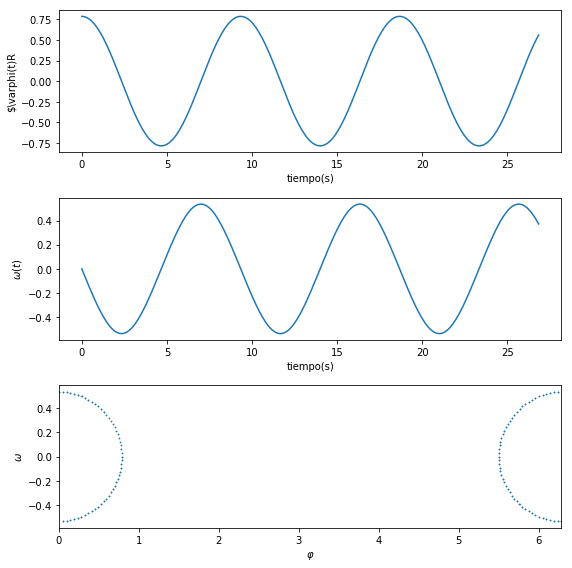

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    phi, omega = y      # Asignamos a la variable y las dos variables del sistema, phi y omega
    g, l = params       # Definimos los parámetros g y l (aceleración de la gravedad y longitud del hilo)
    derivs = [omega ,   # Lista con las dos derivadas 
             - g/l*np.sin(phi)] 
    return derivs

# Parámetros
g = 9.8          # Aceleración de la gravedad, m/s2
l = 20           # Longitud del péndulo 

# ESTIMACIÓN DEL PERIODO FUNDAMENTAL CON OSCILACIONES DE PEQUEÑA AMPLITUD
# La justificación se estudiará en oscilaciones lineales.

print ("Frecuencia angular aproximada bajas oscilaciones") 
fangular_lineal = np.sqrt(g/l)
print ("Omega_lineal = ", fangular_lineal)

periodo_lineal = (2.*np.pi / fangular_lineal)
print ("Periodo lineal ", periodo_lineal)

# Valores iniciales
theta0 = 45 # Ángulo inicial en grados de la masa del péndulo

theta0 = np.deg2rad(45)     # Ángulo en radianes
omega0 = 0.0                # Velocidad inicial de la masa del péndulo.

# Parámetros para el solver de la Ecuación Diferencial Ordinaria (ODE)
params = [g, l]

# Condiciones iniciales
y0 = [theta0, omega0]

# Definición de una lista de tiempos en los que se calcula la solución.
tStop = 3 * periodo_lineal
tInc = periodo_lineal / 100 # Paso de tiempo de integración: 1/100 del periodo aproximado con teoría lineal
t = np.arange(0., tStop, tInc)

# Llamada al solver de la Ecuación Diferencial Ordinaria (ODE)
psoln = odeint(f, y0, t, args=(params,))

# Dibujo de los resultados
fig = plt.figure(1, figsize=(8,8))

# Dibujo de phi en función del tiempo
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('tiempo(s)')
ax1.set_ylabel(r'$\varphi(t)R')

# Dibujo de omega en función del tiempo
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('tiempo(s)')
ax2.set_ylabel(r'$\omega(t)$')

# Dibujo de omega frente a phi
ax3 = fig.add_subplot(313)
twopi = 2.0*np.pi
ax3.plot(psoln[:,0]%twopi, psoln[:,1], '.', ms=1)
ax3.set_xlabel(r'$\varphi$')
ax3.set_ylabel(r'$\omega$')
ax3.set_xlim(0., twopi)

plt.tight_layout()
plt.show()

## Dependencia del periodo de la amplitud inicial

En el péndulo matemático, el periodo del movimiento depende de la amplitud inicial. Para visualizar esto, se va a calcular la solución para diferentes condiciones iniciales. Se planteará una lista de ángulos; para cada ángulo, se calculará la solución numérica. Finalmente, se representarán todas en una sola gráfica. 

Angulo 10
Angulo 20
Angulo 30
Angulo 60
Angulo 90
Análisis de la influencia del dato inicial en phi
i= 0
i= 1
i= 2
i= 3
i= 4


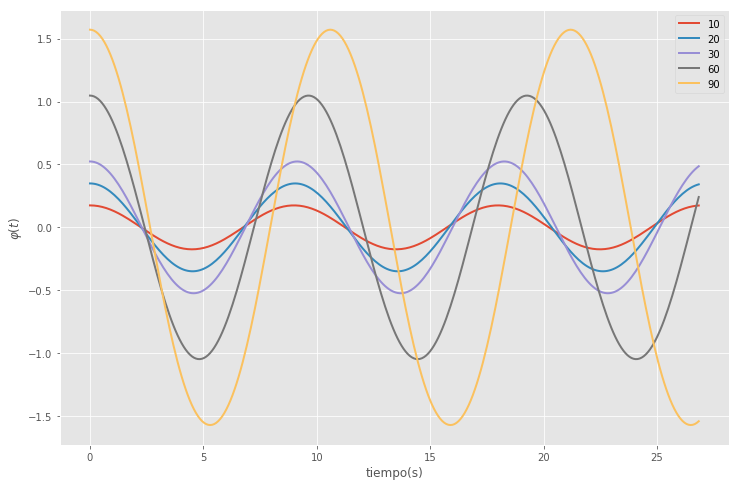

In [3]:
# Condiciones iniciales
fi1 = 10
fi2 = 20
fi3 = 30
fi4 = 60
fi5 = 90

angulos= np.array([fi1,fi2,fi3,fi4,fi5])

angulosr = np.deg2rad(angulos)

soluciones = []
for i in range(len(angulos)): 
    print("Angulo",angulos[i])
    
    fi0 = angulosr[i]
    y0 = [fi0, omega0]

   # Llamada al solver de la Ecuación Diferencial Ordinaria (ODE)
    psoln = odeint(f, y0, t, args=(params,))
    
    soluciones.append(psoln)
    
#==============================================================================
# Dibujo de una gráfica con todos los casos para fi(t)
#==============================================================================
print ("Análisis de la influencia del dato inicial en phi")

plt.style.use("ggplot")

fig2 = plt.figure(1, figsize=(12,8))
for i in range(len(angulos)):
   print("i=",i)
   psoln = soluciones[i]
   line, = plt.plot(t ,psoln[:,0], label = angulos[i], linewidth = 2.0),


plt.xlabel(r'tiempo(s)')       #Etiqueta del eje x
plt.ylabel(r'$\varphi(t)$')           #Etiqueta del eje y

plt.legend(loc=0)  # Mostrar leyenda en posición óptima (loc=0)
plt.show()         # Mostrar figura final

### Conclusión

Observando la gráfica anterior, verá que en el eje de ordenadas se representa el ángulo (en radianes) y en el eje de abscisa el tiempo. Nótese que a medida que aumenta el ángulo inicial, el periodo de la oscilación aumenta. El periodo es la diferencia de tiempos de paso ascendente por cero. 

Nótese que para los tres primeros ángulos se obtiene un periodo muy parecido. Son ángulos pequeños, para los cuales la aproximación del seno por el ángulo (en radianes) es correcta. 

Para valores más altos se observa que, a medida que aumenta el ángulo inicial, aumenta el periodo. Esta dependencia de la amplitud inicial es un efecto no lineal.

Finalmente, se guardará en fichero para visualización sin requerir el cuaderno

In [4]:
fig2.savefig("pendulo_matematico.pdf")